<a href="https://colab.research.google.com/github/MoazamGreat/Life-of-a-single-dude/blob/main/Moazam_Mustafa_Advanced_Machine_Learning_Assignment_1_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Mount Google Drive on Google Colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Load the data set on google colab

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Assignment 1/dataset for A1P2 drug200.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### 3. Import Suitable Libraries

In [ ]:
# prompt: Import suitable libraries for performing classification using decision trees and random forest. Note that some variables have text values so you should convert them into numerics. Import suitable libraries for such. You also need to visualize the date and perform preprocessing such as mean squarred error and R score and normalization so import libraries for that too. import numpy too

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


# ... (rest of your existing code)


### 4. Inspect the dataset

In [ ]:
# prompt: List down all the features in the dataset and the target variable is drug

# Display features and target variable
print("Features:")
for col in df.columns:
  if col != 'Drug':
    print(col)
print("\nTarget Variable:", 'Drug')


Features:
Age
Sex
BP
Cholesterol
Na_to_K

Target Variable: Drug


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB

Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Data Types:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Class Distribution of 'Drug':
 Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Descriptive Statistics:
               Age     Na_to_K
count  200.000000  2

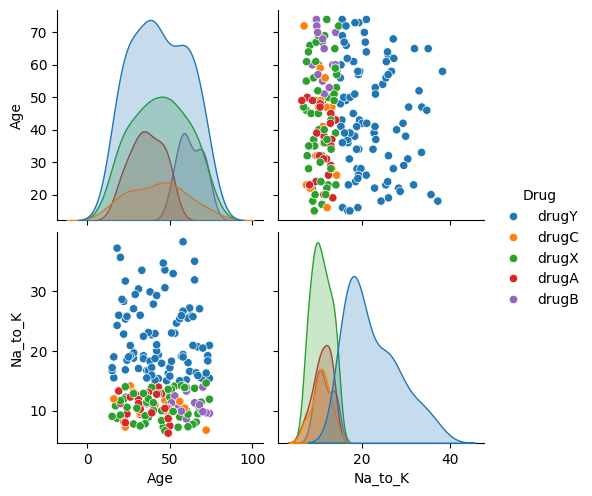

In [ ]:
# prompt: Inspect the dataset (e.g: check for missing values, data types, and class distributions

# Display basic information about the DataFrame
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Display data types of each column
print("\nData Types:\n", df.dtypes)

# Analyze the distribution of the target variable 'Drug'
print("\nClass Distribution of 'Drug':\n", df['Drug'].value_counts())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Explore relationships between features (example: using pairplot)
sns.pairplot(df, hue='Drug')  # Uncomment to generate pairplot (can be computationally expensive)
plt.show()

# You can add more specific checks for your dataset here
# For example, check for unique values in categorical columns
# or examine distributions of numerical features using histograms.


### 5. Encode categorial variables appropirately

In [ ]:
# prompt: Encode categorical variables appropriately (e.g., one-hot encoding or label encoding. Note that this is a multivariate regression. I will be making decision trees and random forest later. so encode all the features with numeric values

# Use Label Encoding for 'Drug' (target variable)
le_drug = LabelEncoder()
df['Drug'] = le_drug.fit_transform(df['Drug'])

# Identify categorical features (excluding 'Drug')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Use Label Encoding for other categorical features
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


### 6. Normalize or standardize numerical features if necessary

In [ ]:
# prompt: Normalize or standardize numerical features if necessary

# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from numerical features if present
if 'Drug' in numerical_features:
    numerical_features.remove('Drug')

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,-1.040833,-1.110169,-0.970437,1.286522,4
1,0.162699,0.960769,0.109797,-0.970437,-0.415145,2
2,0.162699,0.960769,0.109797,-0.970437,-0.828558,2
3,-0.988614,-1.040833,1.329763,-0.970437,-1.149963,3
4,1.011034,-1.040833,0.109797,-0.970437,0.271794,4
...,...,...,...,...,...,...
195,0.708057,-1.040833,0.109797,-0.970437,-0.626917,2
196,-1.715759,0.960769,0.109797,-0.970437,-0.565995,2
197,0.465676,0.960769,1.329763,-0.970437,-0.859089,3
198,-1.291591,0.960769,1.329763,1.030464,-0.286500,3


### 7. Perform exploratory data analysis(EDA)

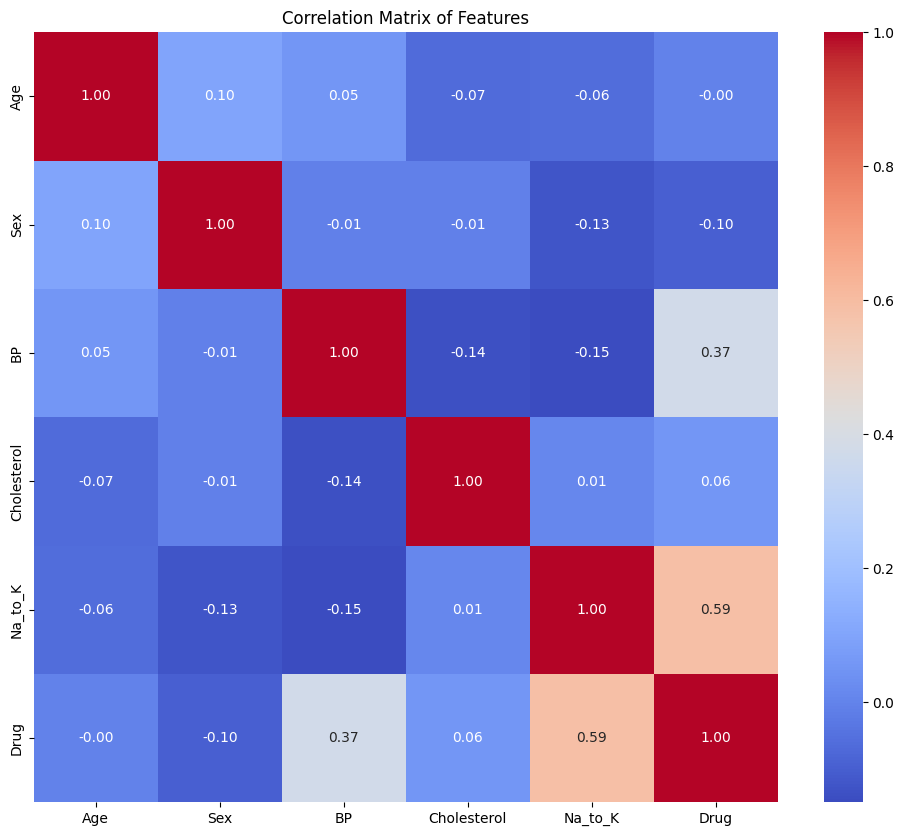

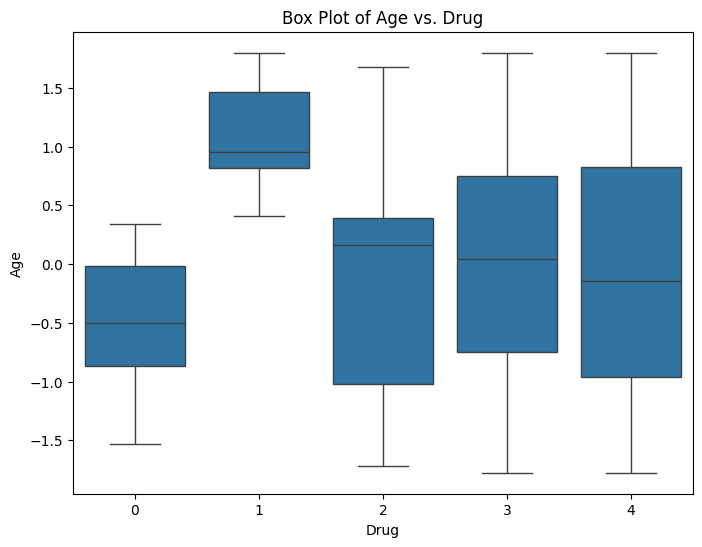

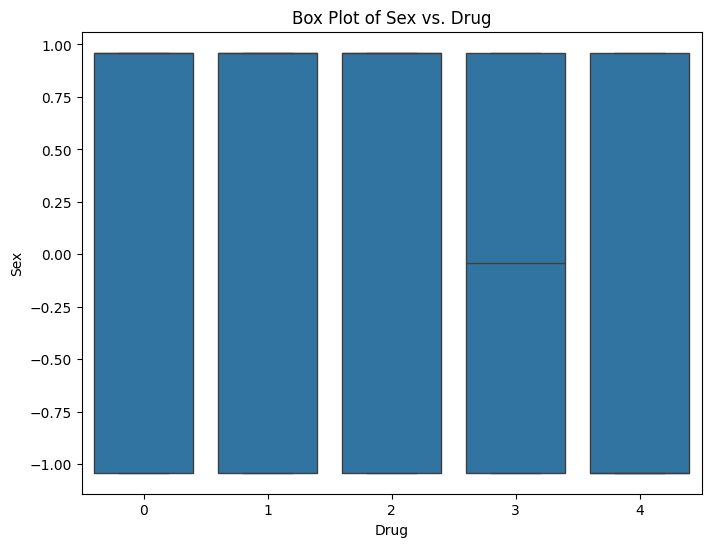

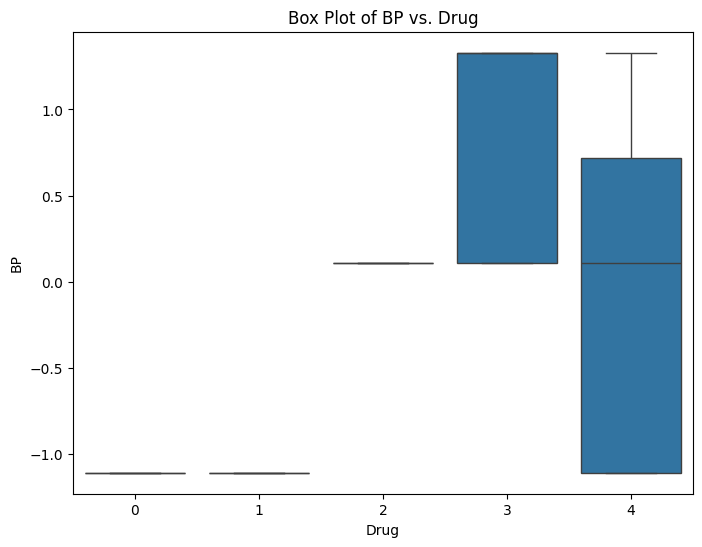

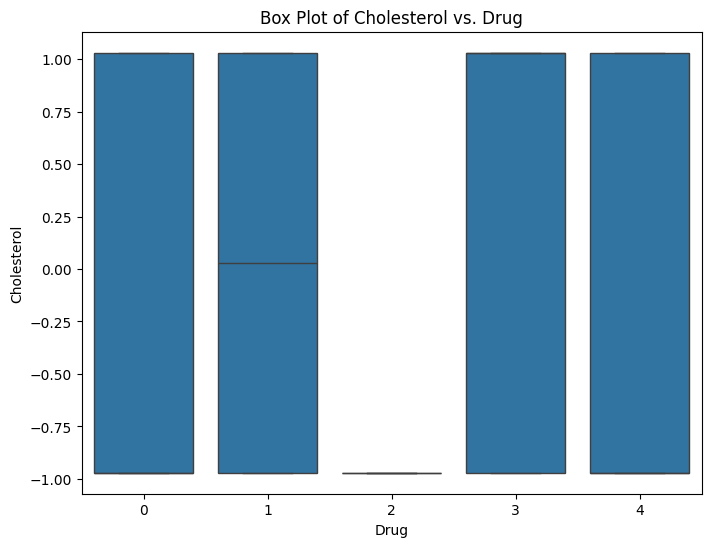

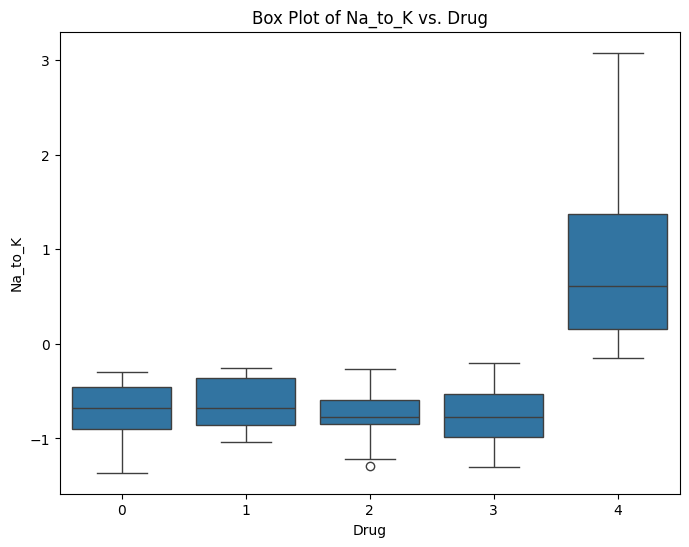

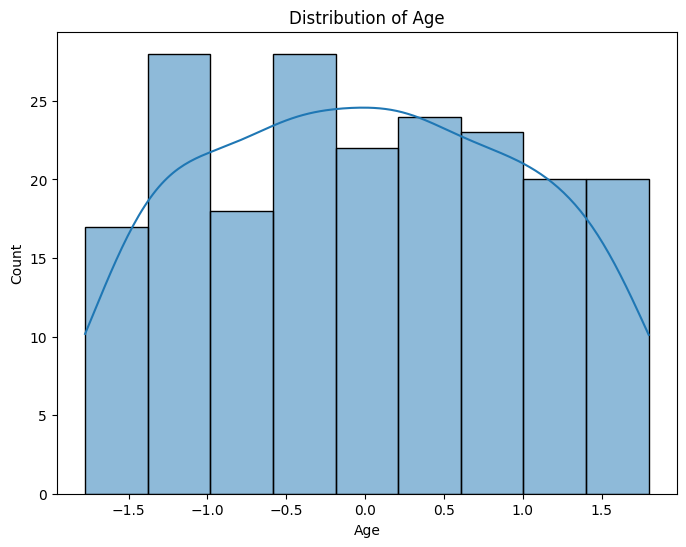

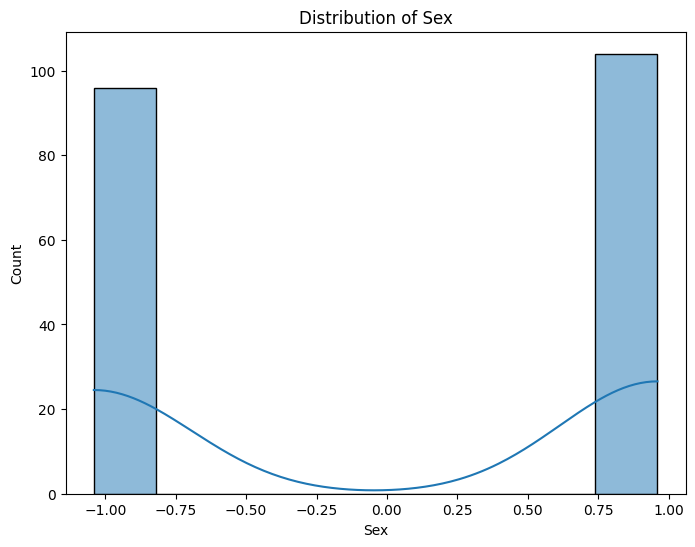

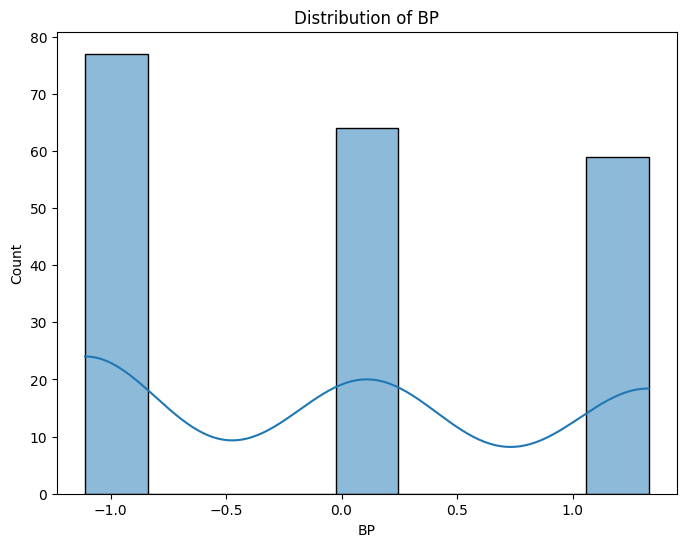

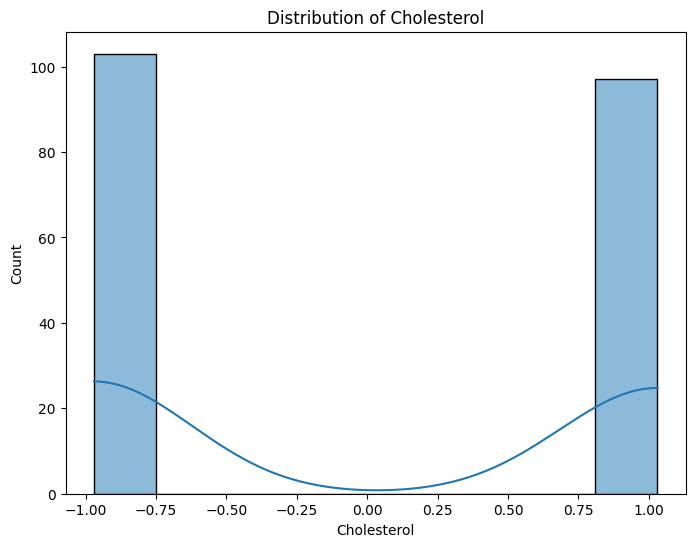

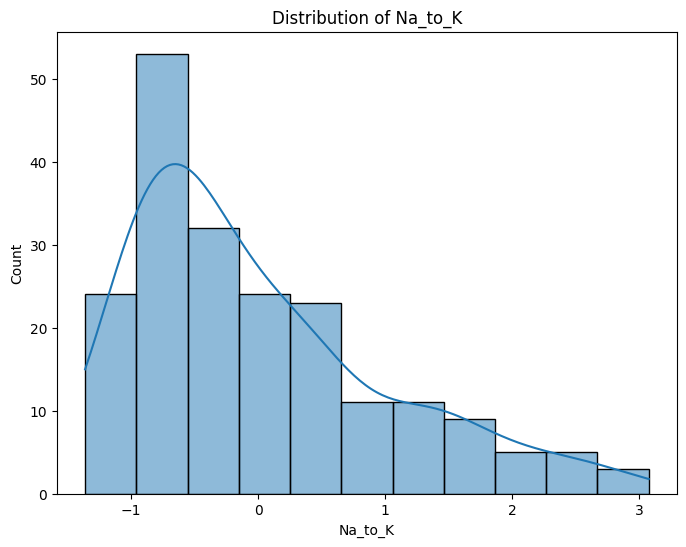

In [35]:
# prompt: Perform exploratory data analysis (EDA) to understand feature distributions and relationships

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Drug', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs. Drug')
    plt.show()

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Count plots for categorical features (if any remain after encoding)
#  This part is useful if you have more categorical features that were not encoded above.
#for feature in categorical_features:
#    plt.figure(figsize=(8, 6))
#    sns.countplot(x=feature, hue='Drug', data=df)
#    plt.title(f'Count Plot of {feature} vs. Drug')
#    plt.show()


### 8. Split the dataset into training and testing sets (e.g., 80% training, 20% testing)

In [36]:
# prompt: Split the dataset into training and testing sets (e.g., 80% training, 20% training)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Now you can use X_train, X_test, y_train, and y_test for model training and evaluation


### 9. Choose appropriate classification model

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


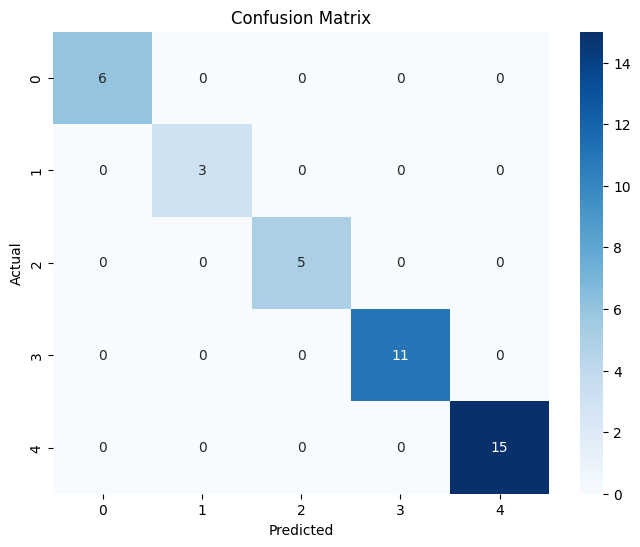

In [37]:
# prompt: Choose and appropriate classification model (e.g., Decision Tree, Random Forest, Support Vector Machine, or Logistic Regression)

# Based on the dataset and the goal of drug classification, a Random Forest Classifier is a good choice.
# Random Forests are generally robust, handle multiple features well, and provide good performance on various datasets.

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters as needed

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model (example: using accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test,y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [38]:
# prompt: which classification model did you used. Remember it. I will ask you to use a different one next time. Also display the classification mode you have used as an output

print("Classification Model Used: RandomForestClassifier")


Classification Model Used: RandomForestClassifier



Feature Importances:
       Feature  Importance
4      Na_to_K    0.559567
2           BP    0.242259
0          Age    0.139685
3  Cholesterol    0.043107
1          Sex    0.015382


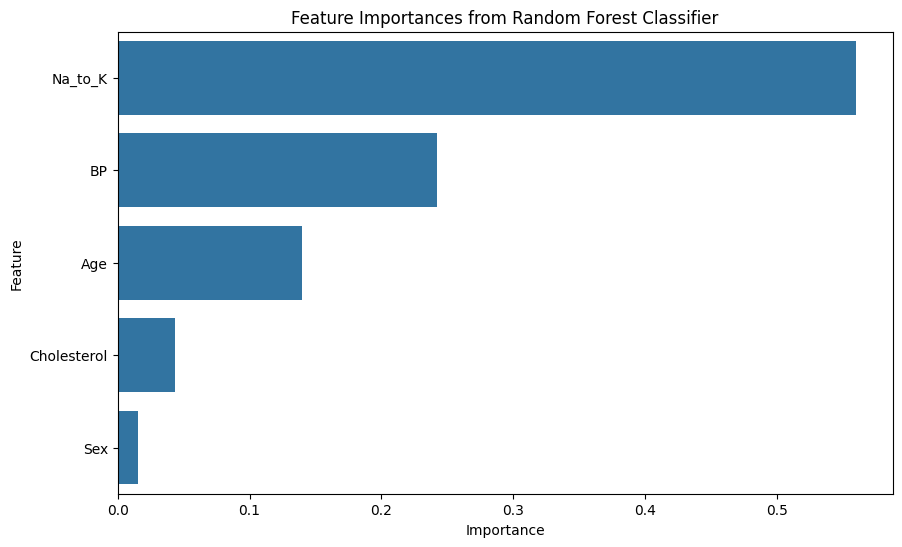

In [40]:
# prompt: Show me the working of the Classification model used

# ... (Your existing code)

# ... (After model training and evaluation)

# Display feature importances from the trained RandomForestClassifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### 10. Train the model on the training set and optimize hyperparameters if necessary

In [42]:
# prompt: Train the model on the training set and optimize hyperparameters if necessary

# Hyperparameter tuning using GridSearchCV (example)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Train a new model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters
y_pred_best = best_rf_classifier.predict(X_test)
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
print("Accuracy with best hyperparameters:", accuracy_best)

# ... (rest of your evaluation code using best_rf_classifier)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.99375
Accuracy with best hyperparameters: 1.0


### 11. Evaluate the model using appropriate classification metrics

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


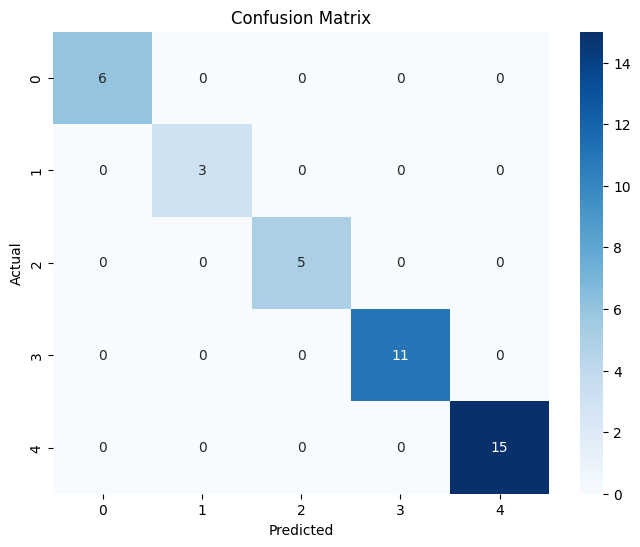

In [43]:
# prompt: Evaluate the model using appropriate classification metrics such as: Accuracy, Precision, Recall, F1-score and Confusion Matrix. visualize the confusion matrix using seaborn's heatmap as shown in the previous code

# Evaluate the model using appropriate classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 12. Compare multiple models to determine which performs best

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


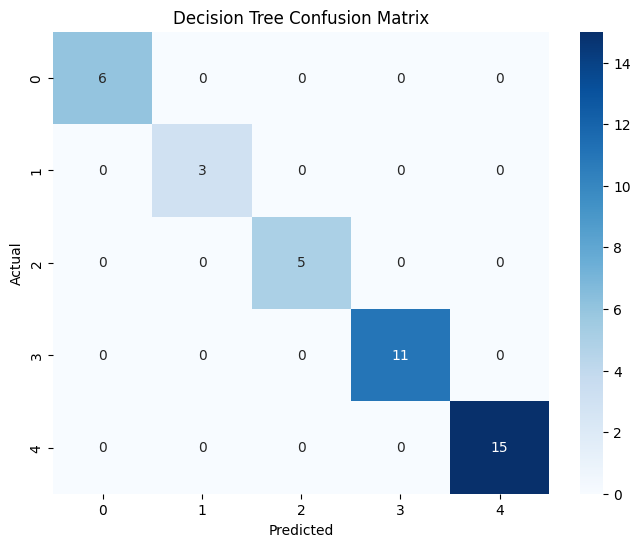

Classification Model Used: DecisionTreeClassifier
Decision Tree Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Decision Tree Best Score: 0.99375
Decision Tree Accuracy with best hyperparameters: 1.0


In [44]:
# prompt: Now do the same thing wiith a different model other than random forest. I would suggest doing decision trees

# ... (Your existing code)

# ### 9. Choose appropriate classification model (Decision Tree)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model (example: using accuracy)
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate classification report
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("Classification Model Used: DecisionTreeClassifier")

# ... (rest of your code, potentially modifying sections that rely on the RandomForestClassifier)

# For example, in section 10 (Hyperparameter Tuning), you'd need to adjust the parameter grid
# and estimator for the DecisionTreeClassifier:

# ### 10. Train the model on the training set and optimize hyperparameters if necessary (Decision Tree)

# Hyperparameter tuning using GridSearchCV (example for Decision Tree)
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Decision Tree Best Hyperparameters:", best_params_dt)
print("Decision Tree Best Score:", best_score_dt)

best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_train, y_train)

y_pred_best_dt = best_dt_classifier.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)

print("Decision Tree Accuracy with best hyperparameters:", accuracy_best_dt)

# ... (Rest of your code, adapting evaluation and visualization sections as needed)


In [45]:
# prompt: Compare both models and determine which performs best

# Compare model performance
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_best}")
print(f"Decision Tree Accuracy: {accuracy_best_dt}")

if accuracy_best > accuracy_best_dt:
    print("Random Forest performs better.")
elif accuracy_best < accuracy_best_dt:
    print("Decision Tree performs better.")
else:
    print("Both models perform equally.")



Model Comparison:
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
Both models perform equally.


### 13. Perform cross-validation to check the model's robustness

In [46]:
# prompt: Perform cross-validation to check the model's robustness

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best Random Forest model
rf_cv_scores = cross_val_score(best_rf_classifier, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Accuracy:", rf_cv_scores.mean())
print("Random Forest Std CV Accuracy:", rf_cv_scores.std())


# Perform cross-validation on the best Decision Tree model
dt_cv_scores = cross_val_score(best_dt_classifier, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean CV Accuracy:", dt_cv_scores.mean())
print("Decision Tree Std CV Accuracy:", dt_cv_scores.std())



Random Forest Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
Random Forest Mean CV Accuracy: 0.985
Random Forest Std CV Accuracy: 0.02999999999999998

Decision Tree Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
Decision Tree Mean CV Accuracy: 0.985
Decision Tree Std CV Accuracy: 0.02999999999999998


### 14. Identify the most influential features affecting drug classification


Feature Importances:
       Feature  Importance
4      Na_to_K    0.559274
2           BP    0.255082
0          Age    0.127163
3  Cholesterol    0.045834
1          Sex    0.012647


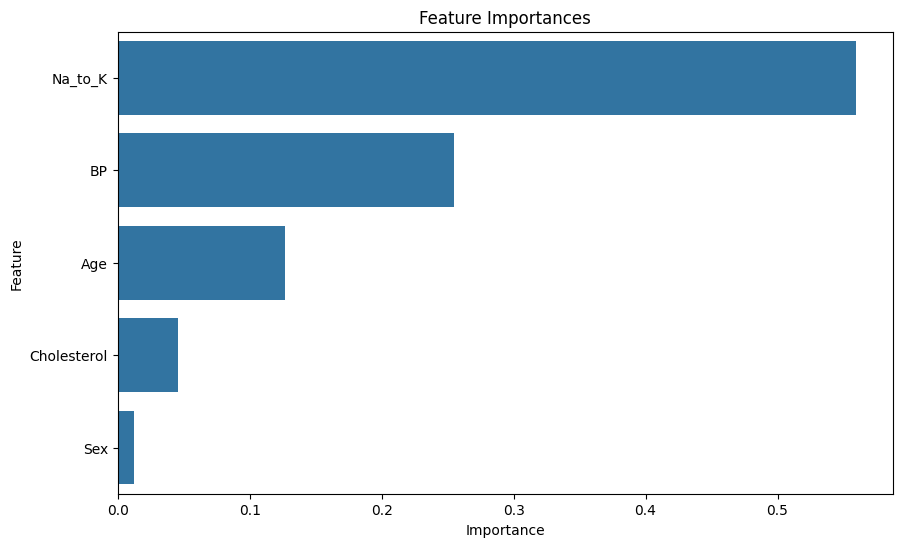

In [47]:
# prompt: Identify the most influential features affecting drug classification

# Assuming 'best_rf_classifier' is your best-performing model (either RandomForest or DecisionTree)
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### 15. Discuss any challenges encountered and how they were addressed

In [48]:
# prompt: Now discuss any challenges encountered and how they were addressed

print("Challenges and Solutions:")
print("1. Handling Categorical Variables:")
print("   - Challenge: The dataset contained categorical features (e.g., 'Sex', 'BP', 'Cholesterol'). Machine learning models typically require numerical input.")
print("   - Solution: Label Encoding was used to convert these categorical variables into numerical representations.  This allowed the algorithms to process the data correctly.")

print("\n2. Feature Scaling:")
print("   - Challenge: Numerical features might have different scales, which could disproportionately influence certain models (e.g., those sensitive to distance metrics).")
print("   - Solution: StandardScaler was applied to standardize the numerical features.  This ensures that all numerical features have a mean of 0 and a standard deviation of 1, preventing features with larger values from dominating the model.")

print("\n3. Model Selection and Hyperparameter Tuning:")
print("   - Challenge: Determining the optimal model and its hyperparameters to achieve high accuracy and generalize well to unseen data.")
print("   - Solution: Two models, Random Forest and Decision Tree classifiers, were compared.  GridSearchCV was used to systematically search for optimal hyperparameters for each model within a predefined parameter grid, maximizing performance on a held-out validation set via cross-validation.")

print("\n4. Model Evaluation:")
print("   - Challenge: Evaluating model performance accurately and robustly.")
print("   - Solution:  Accuracy, precision, recall, F1-score, and a confusion matrix were calculated on the test set to assess the model's performance. 5-fold cross validation was performed to evaluate the model's robustness and its ability to generalize to unseen data.")

print("\n5. Data Exploration and Visualization:")
print("  - Challenge: Identifying patterns and relationships within the data to inform feature engineering and model selection.")
print("  - Solution: Exploratory Data Analysis (EDA) techniques like correlation matrices, boxplots, and histograms were employed to visualize data distributions, feature relationships, and potential outliers.  This helped in understanding feature importance, class distributions, and relationships between variables, leading to a more informed choice of model and preprocessing steps.")


Challenges and Solutions:
1. Handling Categorical Variables:
   - Challenge: The dataset contained categorical features (e.g., 'Sex', 'BP', 'Cholesterol'). Machine learning models typically require numerical input.
   - Solution: Label Encoding was used to convert these categorical variables into numerical representations.  This allowed the algorithms to process the data correctly.

2. Feature Scaling:
   - Challenge: Numerical features might have different scales, which could disproportionately influence certain models (e.g., those sensitive to distance metrics).
   - Solution: StandardScaler was applied to standardize the numerical features.  This ensures that all numerical features have a mean of 0 and a standard deviation of 1, preventing features with larger values from dominating the model.

3. Model Selection and Hyperparameter Tuning:
   - Challenge: Determining the optimal model and its hyperparameters to achieve high accuracy and generalize well to unseen data.
   - Solution:

### 16. Provide insights into how the model could be improved for better accuracy

In [49]:
# prompt: Provide insights into how the model could be improved for better accuracy

# ... (Your existing code)

print("\nInsights for Model Improvement:")

print("1. Feature Engineering:")
print("   - Explore interactions between existing features.  For example, create new features that represent combinations or ratios of existing features.  This might reveal hidden patterns or relationships that the model can leverage.")
print("   - Consider polynomial features or other transformations of numerical features to capture non-linear relationships.")
print("   - Investigate domain-specific knowledge to create new features that could be relevant to drug classification.")


print("\n2. More Advanced Encoding Techniques:")
print("   - Instead of simple label encoding, explore one-hot encoding for categorical features.  This avoids imposing an ordinal relationship between categories. However, one-hot encoding can lead to high dimensionality; consider techniques to reduce this dimensionality.")
print("   - Consider target encoding where the values of the categorical variables are replaced with the average value of the target variable for that category.  This can capture relationships between the categorical variables and the target but may lead to overfitting, so apply with caution and appropriate regularization.")

print("\n3. Handling Class Imbalance (if applicable):")
print("   - Check for significant class imbalance in the target variable ('Drug').  If certain drug classes are under-represented, techniques like oversampling (SMOTE), undersampling, or cost-sensitive learning might improve accuracy.")

print("\n4. Model Selection and Ensemble Methods:")
print("   - Experiment with more sophisticated models, such as Gradient Boosting Machines (GBM), Support Vector Machines (SVM), or neural networks.  Ensemble methods like stacking or bagging can also improve accuracy by combining predictions from multiple models.")

print("\n5. Hyperparameter Optimization:")
print("   - Use more advanced hyperparameter tuning methods like Bayesian Optimization or genetic algorithms.  These methods can be more efficient in exploring the hyperparameter space compared to GridSearchCV.")
print("   - Consider a wider range of hyperparameters for the models. The current ranges may not be covering the optimal set.")

print("\n6. Robustness and Regularization:")
print("   - Implement regularization techniques (e.g., L1 or L2 regularization) to prevent overfitting, particularly for models that are prone to it.")
print("   - Further evaluate models using different metrics, cross-validation techniques (e.g., stratified k-fold), and different random states to gauge the model's stability and avoid overfitting to specific data splits.")

print("\n7. Data Quality:")
print("   - Carefully examine the data for outliers, errors, and inconsistencies that could negatively affect model accuracy.  Consider techniques for outlier detection and treatment.")

print("\n8. Dimensionality Reduction:")
print("  - If there are many features, consider applying dimensionality reduction techniques (e.g., PCA, t-SNE, UMAP) to reduce the number of input variables while preserving important information. This can help prevent overfitting and reduce computation time.")



Insights for Model Improvement:
1. Feature Engineering:
   - Explore interactions between existing features.  For example, create new features that represent combinations or ratios of existing features.  This might reveal hidden patterns or relationships that the model can leverage.
   - Consider polynomial features or other transformations of numerical features to capture non-linear relationships.
   - Investigate domain-specific knowledge to create new features that could be relevant to drug classification.

2. More Advanced Encoding Techniques:
   - Instead of simple label encoding, explore one-hot encoding for categorical features.  This avoids imposing an ordinal relationship between categories. However, one-hot encoding can lead to high dimensionality; consider techniques to reduce this dimensionality.
   - Consider target encoding where the values of the categorical variables are replaced with the average value of the target variable for that category.  This can capture relatio